In [16]:
import numpy as np
import matplotlib.pyplot as plt

def mse(y1, y2):
    return np.mean((y1 - y2)**2, axis=0)

def huberloss(y1, y2, d = 1):
    a = np.abs(y1 - y2)

    return np.mean(np.where(a < d, a**2/2, d*(a - d/2)), axis=0)


class LinearRegressor:
    def __init__(self, learning_rate = 0.001, n_iterations = 10000, epsilon = 0.01, loss_fn = mse):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.loss_fn = loss_fn
        self.model_parameters = None

    def fit(self, X, y):
        delta = 0.00001
        
        num_parameters = X.shape[1] + 1

        self.model_parameters = np.random.rand(num_parameters)
        gradients = np.zeros(num_parameters)
        eps = np.zeros_like(gradients) + self.epsilon
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        delI = delta*np.identity(num_parameters)

        for i in range(self.n_iterations):
            params = np.zeros_like(delI) + self.model_parameters
            grads = delI + self.model_parameters
            gradients = (self.loss_fn(X_@grads.T, y) - self.loss_fn(X_@params.T, y))/delta
            self.model_parameters -= self.learning_rate*gradients
            # print(self.loss_fn(np.dot(X_,params.T), y))
            if (np.abs(gradients) < eps).all(0):
                break
            
    def predict(self, X):
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        
        return (X_@self.model_parameters).reshape(-1,1)

    def __repr__(self):
        return f"Model Parameters: {self.model_parameters}"
    

In [3]:
np.random.seed(10)
lr = LinearRegressor(learning_rate=0.001, n_iterations=10000, loss_fn=mse)

num_inst = 10
X = 6*np.random.rand(num_inst,2) - 3
y = (30*X[:,0] + 0.5*X[:,1] + 10 + (np.random.rand(num_inst)) - (np.random.rand(num_inst))).reshape(-1,1)

lr.fit(X,y)
print(lr)
x2 = np.array([[10,10]])
lr.predict(x2)


Model Parameters: [29.89088944  0.51976445 10.06570817]


array([[314.172247]])

CPU times: total: 828 ms
Wall time: 872 ms
Model Parameters: [3.00347174 4.81494109]


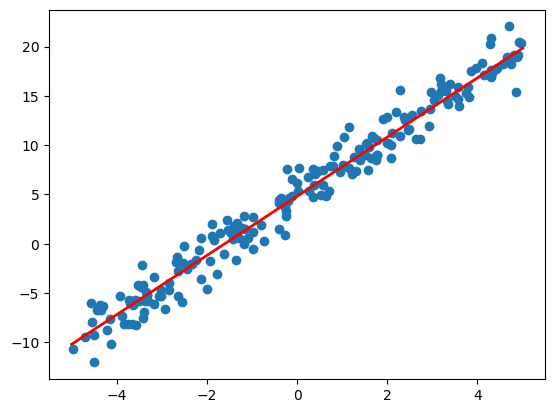

In [18]:
num_inst = 200
X = 10*np.random.rand(num_inst,1) - 5
y = 3*X + 5 + np.random.randn(num_inst,1) - np.random.randn(num_inst,1)

lr1 = LinearRegressor(0.001, 10000, loss_fn=huberloss)
%time lr1.fit(X,y)
print(lr1)

plt.scatter(X,y)
a = [-5, 5]
b = [a[0]*lr1.model_parameters[0] + lr1.model_parameters[1], a[1]*lr1.model_parameters[0] + lr1.model_parameters[1]]
plt.plot(a, b, color='r', linewidth=2)

Model Parameters: [ 1.99250757  0.9020437  -2.8061613 ]


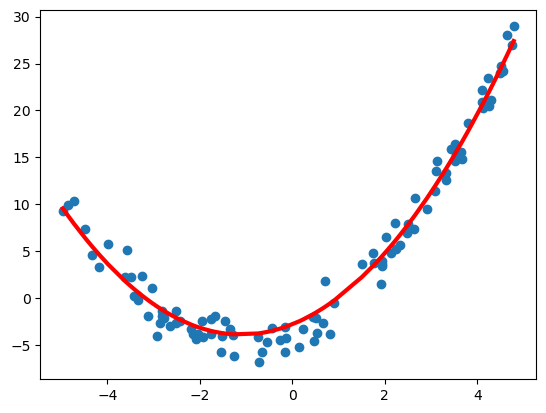

In [19]:
num_inst = 100
X = 10*np.random.rand(num_inst,1) - 5
X = (np.sort(X, axis=None)).reshape(-1,1)
y = 2*X + X**2 - 4 + np.random.randn(num_inst,1) - np.random.randn(num_inst,1)
X_ = np.insert(X,1,(X**2).reshape(-1),axis=1)
# print(X, X_)
polyreg = LinearRegressor(learning_rate=0.001, n_iterations=10000, epsilon=0.05, loss_fn=huberloss)
polyreg.fit(X_, y)
print(polyreg)

y_ = polyreg.predict(X_)

plt.scatter(X,y)
plt.plot(X_[:,0], y_, color='r', linewidth=3)

CPU times: total: 359 ms
Wall time: 365 ms
Model Parameters: [-0.86119772 -1.8949922   0.94498883  3.93357867]


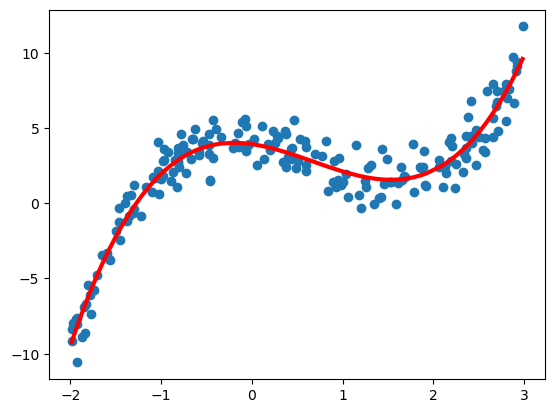

In [6]:
num_inst = 200
X = 5*np.random.rand(num_inst,1) - 2
X = (np.sort(X, axis=None)).reshape(-1,1)
y = -1*X - 2*X**2 + X**3 + 4 + np.random.randn(num_inst,1)
X_ = np.insert(X,1,(X**2).reshape(-1),axis=1)
X_ = np.insert(X_,2,(X**3).reshape(-1),axis=1)
plt.scatter(X,y)

polyreg = LinearRegressor(learning_rate=0.001, n_iterations=10000, epsilon=0.1, loss_fn=mse)
%time polyreg.fit(X_, y)
print(polyreg)

y_ = polyreg.predict(X_)

plt.plot(X_[:,0], y_, color='r', linewidth=3)

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sg_loss(product, y_actual):
    p_pred = sigmoid(product)

    return np.mean((- y_actual*np.log10(p_pred) - (1-y_actual)*np.log10(1-p_pred)), axis=0)
    

CPU times: total: 969 ms
Wall time: 956 ms
Model Parameters: [ 0.04864509 -0.09948285]


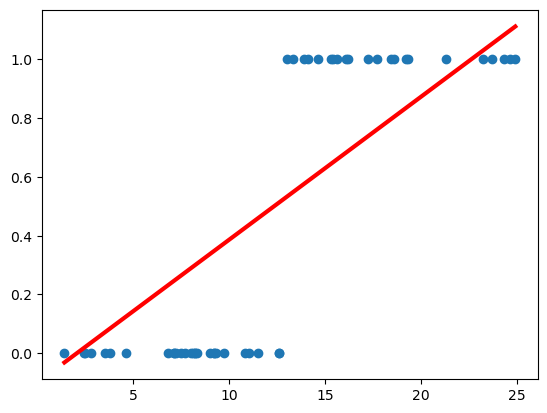

In [8]:
np.random.seed(11)

num_inst = 50
X = np.random.randint(1, 250, (num_inst, 1))/10
X = np.sort(X,axis=None).reshape(-1,1)
# print(X)
y = np.zeros_like(X)
for i in range(len(X)):
    if X[i][0] >= 13.0:
        y[i][0] = 1
clf1 = LinearRegressor(learning_rate=0.001, n_iterations=10000, loss_fn=sg_loss)
%time clf1.fit(X,y)
print(clf1)

plt.scatter(X,y)
# a = [1, 25]
# b = [a[0]*clf1.model_parameters[0] + clf1.model_parameters[1], a[1]*clf1.model_parameters[0] + clf1.model_parameters[1]]
# plt.plot(a, b, color='r', linewidth=2)


y_ = clf1.predict(X)
plt.plot(X[:,0], y_, color='r', linewidth=3)

In [9]:
a = np.random.randint(-100, 100, (10,3))/10
b = np.random.randint(0, 2, (10,1))

a, b

(array([[ 8.3, -2.1,  9.2],
        [ 6.8, -7.3,  3.3],
        [ 8.1, -2.9,  7.8],
        [ 8.7, -9.9,  3.1],
        [ 3.6, -3.2, -2.8],
        [ 1.4,  6. , -2.2],
        [-8.1,  5.3,  1.7],
        [-1. ,  6.6,  8.7],
        [-8.3, -5.7, -8.2],
        [-5.2,  3.8, -5.3]]),
 array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1]]))

In [10]:
sg_loss(a, b)


array([2.60874273, 0.51872307, 1.62070521])

In [11]:
a = np.array([[-10, 10],[35, 35], [12, -12]])
b = np.array([[0],[0],[1]])

In [12]:
sg_loss(a, b)

array([5.0588203, 8.2436465])

In [13]:
sigmoid(36.8)

1.0

In [14]:
1 + np.exp(-36.8)

1.0